In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.insert(0, "../../code-previous")

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import sklearn.feature_extraction as skfeatures
import time
import os

import operator

import string
import swifter
import nltk
stopwords = nltk.corpus.stopwords.words('english')


import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sreejith_s', api_key='rcet0rTqFCc3WeOzWTjv')



from sklearn.feature_extraction.text import CountVectorizer


from unicodedata import category
from tqdm import tqdm
tqdm.pandas(desc="Progress")

import seaborn as sns
sns.set_style('white')
import matplotlib.pylab as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
data_path = "/mnt/disks/vault/analysis-data/interdisciplinary-novelty-analysis/all_discipline_data.pql"
data = pd.read_pickle(data_path)

In [5]:
physics_labels = ['Physics, Applied',
                  'Physics, Fluids & Plasmas',
                  'Physics, Atomic, Molecular & Chemical',
                  'Physics, Multidisciplinary',
                  'Physics, Condensed Matter',
                  'Physics, Nuclear',
                  'Physics, Particles & Fields',
                  'Physics, Mathematical']

In [6]:
physics_data = data[data["Label"].isin(physics_labels)]
article_df = None

In [7]:
physics_applied_phy = physics_data.sort_values(by="PubYear")
vectorizer1 = CountVectorizer()
vectorized_words1 = vectorizer1.fit_transform(physics_applied_phy.title_without_stopwords)

In [15]:
chemistry_labels = ['Chemistry, Applied',
                    'Chemistry, Multidisciplinary',
                    'Chemistry, Analytical',
                    'Chemistry, Inorganic & Nuclear',
                    'Chemistry, Organic',
                    'Chemistry, Physical',
                    'Electrochemistry']

In [16]:
chemistry_data = data[data["Label"].isin(chemistry_labels)]

In [17]:
#physics_applied_phy = physics_data[physics_data.Label == "Physics, Nuclear"]
chemistry_data = chemistry_data.sort_values(by="PubYear")
vectorizer_chem = CountVectorizer()
vectorized_words2 = vectorizer_chem.fit_transform(chemistry_data.title_without_stopwords)

In [18]:
row_counts_physics = physics_applied_phy.groupby('PubYear').size().reset_index(name="count")
counts_physics =  list(row_counts_physics["count"])

row_counts_chem = chemistry_data.groupby('PubYear').size().reset_index(name="count")
counts_chem =  list(row_counts_chem["count"])

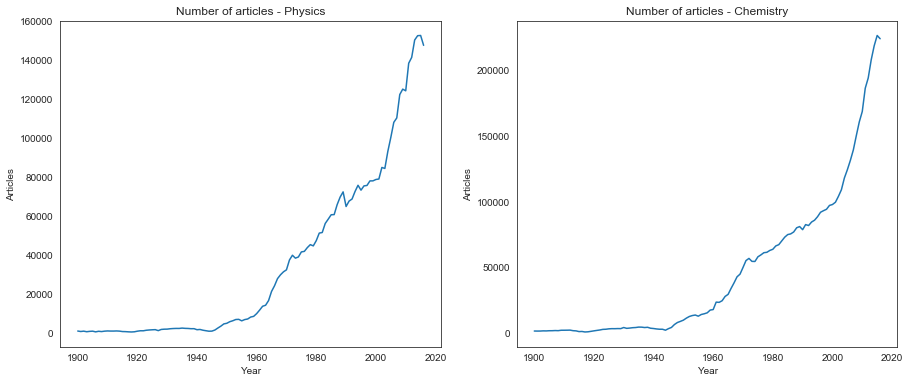

In [20]:
f = plt.figure(figsize=(15,6))

years = list(range(1900,2017))

ax = f.add_subplot(121)
ax.set_xlabel("Year")
ax.set_ylabel("Articles")
ax.set_title("Number of articles - Physics")
ax.plot(row_counts_physics["PubYear"],counts_physics)


ax = f.add_subplot(122)
ax.set_xlabel("Year")
ax.set_ylabel("Articles")
ax.set_title("Number of articles - Chemistry")
ax.plot(row_counts_chem["PubYear"], counts_chem)


In [41]:
N = 200

vocab_phy = vectorizer1.vocabulary_
rev_vocab_phy = {index:word for word,index in vocab_phy.items()}
# Highest Frequency words all time
all_time_word_frequencies_phy = vectorized_words1.sum(axis=0).reshape(-1,).tolist()[0]
word_index_with_freq_phy = {index:freq for index,freq in enumerate(all_time_word_frequencies_phy)}
word_with_freq_phy = {rev_vocab[index]:np.log(freq + 1) for index, freq in word_index_with_freq_phy.items()}

sorted_word_with_freq_phy = sorted(word_with_freq_phy.items(), key=operator.itemgetter(1), reverse=True)

In [61]:
#start = 300
#end = 350

top_words_all_corpus_phy = pd.DataFrame(list(sorted_word_with_freq_phy), columns=["word","frequency"])
phy_words = list(top_words_all_corpus_phy["word"])
len(top_words_all_corpus_phy)

279582

In [42]:
N = 200

vocab_chem = vectorizer_chem.vocabulary_
rev_vocab2 = {index:word for word,index in vocab_chem.items()}
# Highest Frequency words all time
all_time_word_frequencies_chem = vectorized_words2.sum(axis=0).reshape(-1,).tolist()[0]
word_index_with_freq_chem = {index:freq for index,freq in enumerate(all_time_word_frequencies_chem)}
word_with_freq_chem = {rev_vocab2[index]:np.log(freq + 1) for index, freq in word_index_with_freq_chem.items()}

sorted_word_with_freq_chem = sorted(word_with_freq_chem.items(), key=operator.itemgetter(1), reverse=True)

In [62]:
top_words_all_corpus_chem = pd.DataFrame(list(sorted_word_with_freq_chem), columns=["word","frequency"])
chem_words = list(top_words_all_corpus_chem["word"])

len(top_words_all_corpus_chem)

817963

In [ ]:
common_words = [word for word in phy_words if word in chem_words]
#common_words = list(set(phy_words) & set(chem_words))

In [87]:
common_words[2300:2350]

['carbonizing',
 'ethylcellosolve',
 'mg97y2zn1',
 'area',
 'stretches',
 'hon',
 'vis',
 'swellable',
 '1t1g',
 'adige',
 'spawn',
 'hof3',
 'impactor',
 'electrospin',
 'words',
 'ocdf',
 'molarity',
 'apercu',
 'autoinhibition',
 'toning',
 'ypd',
 'scribed',
 'clch2ch2nh2',
 'ausgeglichenen',
 'mapreduce',
 'mesityl',
 'anticoincidencias',
 'sufficiently',
 'fanatic',
 'memered',
 'et2me2n',
 'dpo4',
 'hoips',
 'nanodynamics',
 'undecamer',
 'dodecylbenzene',
 'polydimethylglutarimide',
 'phosphides',
 'cyclopentadithiophenone',
 'furlani',
 '7bi0',
 'capillare',
 'tete',
 'serratum',
 'asymmetric',
 'communition',
 'unpacking',
 'syst',
 'arabinofuranosyladenine',
 'sandglass']

In [ ]:
row_counts = physics_applied_phy.groupby('PubYear').size().reset_index(name="count")
counts =  list(row_counts["count"])

In [80]:
#words = ['laser', 'electron', 'quantum', 'carbon', 'nanoparticles', 
#         'semiconductor', 'spectroscopy', 'superconducting']

words = ['meson','quark','phonon']

frequencies_physics = []

for word in words:
    word_index = vocab_phy[word]
    yearly_freq_for_word = []
    index_start = 0
    
    for i in range(len(row_counts_physics)):
        offset = index_start + counts_physics[i]
        tmp = vectorized_words1[index_start:offset,:]
        yearly_word_freq = tmp.sum(axis=0).reshape(-1,).tolist()[0][word_index]
        
        ## Normalizing - Divide by number of physics articles in the year
        _tmp = float(yearly_word_freq) / counts_physics[i]
        
        yearly_freq_for_word.append(_tmp)
        index_start = offset
    
    frequencies_physics.append(yearly_freq_for_word)

In [81]:
frequencies_chemistry = []

for word in words:
    word_index = vocab_chem[word]
    yearly_freq_for_word = []
    index_start = 0
    
    for i in range(len(row_counts_chem)):
        offset = index_start + counts_chem[i]
        tmp = vectorized_words2[index_start:offset,:]
        yearly_word_freq = tmp.sum(axis=0).reshape(-1,).tolist()[0][word_index]
        
        ## Normalizing - Divide by number of physics articles in the year
        _tmp = float(yearly_word_freq) / counts_chem[i]
        
        yearly_freq_for_word.append(_tmp)
        index_start = offset
    
    frequencies_chemistry.append(yearly_freq_for_word)

In [82]:
years = list(range(1900,2017))


datatoplot = [go.Scatter(
            x=years,
            y=frequencies_physics[0],
            mode = 'lines+markers',
            name=words[0] + "-physics",
            marker=dict(
                color='#228B22'
            )
    ),go.Scatter(
            x=years,
            y=frequencies_chemistry[0],
            mode = 'lines+markers',
            name=words[0] + "-chemistry",
            marker=dict(
                color='#000080'
            )
    )]


layout = go.Layout(
    title='Word Propagation for the same word in Physics and Chemistry',
    
    xaxis=dict(
        title='Year',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Popularity Ratio',
        titlefont=dict(
            family='Lato',
            color='#7f7f7f'
        )
    )
)

fig1 = go.Figure(data=datatoplot, layout=layout)
py.iplot(fig1, filename='freq')

/usr/local/lib/python3.6/dist-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

